## Excercise

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [4]:
# Import dataset 
df = pd.read_csv("eda.csv")
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


In [11]:
df['date'].max()
df['date'] = pd.to_datetime(df['date'])
latest_date = df['date'].max()
print("Latest date:", latest_date)
df['date'].head
df['yr_renovated'] = df['yr_renovated'] / 10

#df['yr_renovated'].describe()

print("Unrenovated homes:", (df['yr_renovated'] == 0).sum())
print("Renovated homes:", (df['yr_renovated'] > 0).sum())

df[df['yr_renovated'] > 0]['yr_renovated'].describe()

#Effective Age -- How old is the house based on the most recent major work?
df['effective_year'] = df[['yr_built', 'yr_renovated']].max(axis=1)
df['effective_age'] = 2015 - df['effective_year']
df['effective_age'].describe()

Latest date: 2015-05-27 00:00:00
Unrenovated homes: 17005
Renovated homes: 744


count    21597.000000
mean        42.054869
std         28.945393
min          0.000000
25%         16.000000
50%         38.000000
75%         61.000000
max        115.000000
Name: effective_age, dtype: float64

In [12]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1',
       'effective_year', 'effective_age'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   bedrooms        21597 non-null  float64       
 2   bathrooms       21597 non-null  float64       
 3   sqft_living     21597 non-null  float64       
 4   sqft_lot        21597 non-null  float64       
 5   floors          21597 non-null  float64       
 6   waterfront      19206 non-null  float64       
 7   view            21534 non-null  float64       
 8   condition       21597 non-null  int64         
 9   grade           21597 non-null  int64         
 10  sqft_above      21597 non-null  float64       
 11  sqft_basement   21145 non-null  float64       
 12  yr_built        21597 non-null  int64         
 13  yr_renovated    17749 non-null  float64       
 14  zipcode         21597 non-null  int64         
 15  la

In [14]:
df2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'effective_age', 'zipcode','date', 'price', 'id.1']]

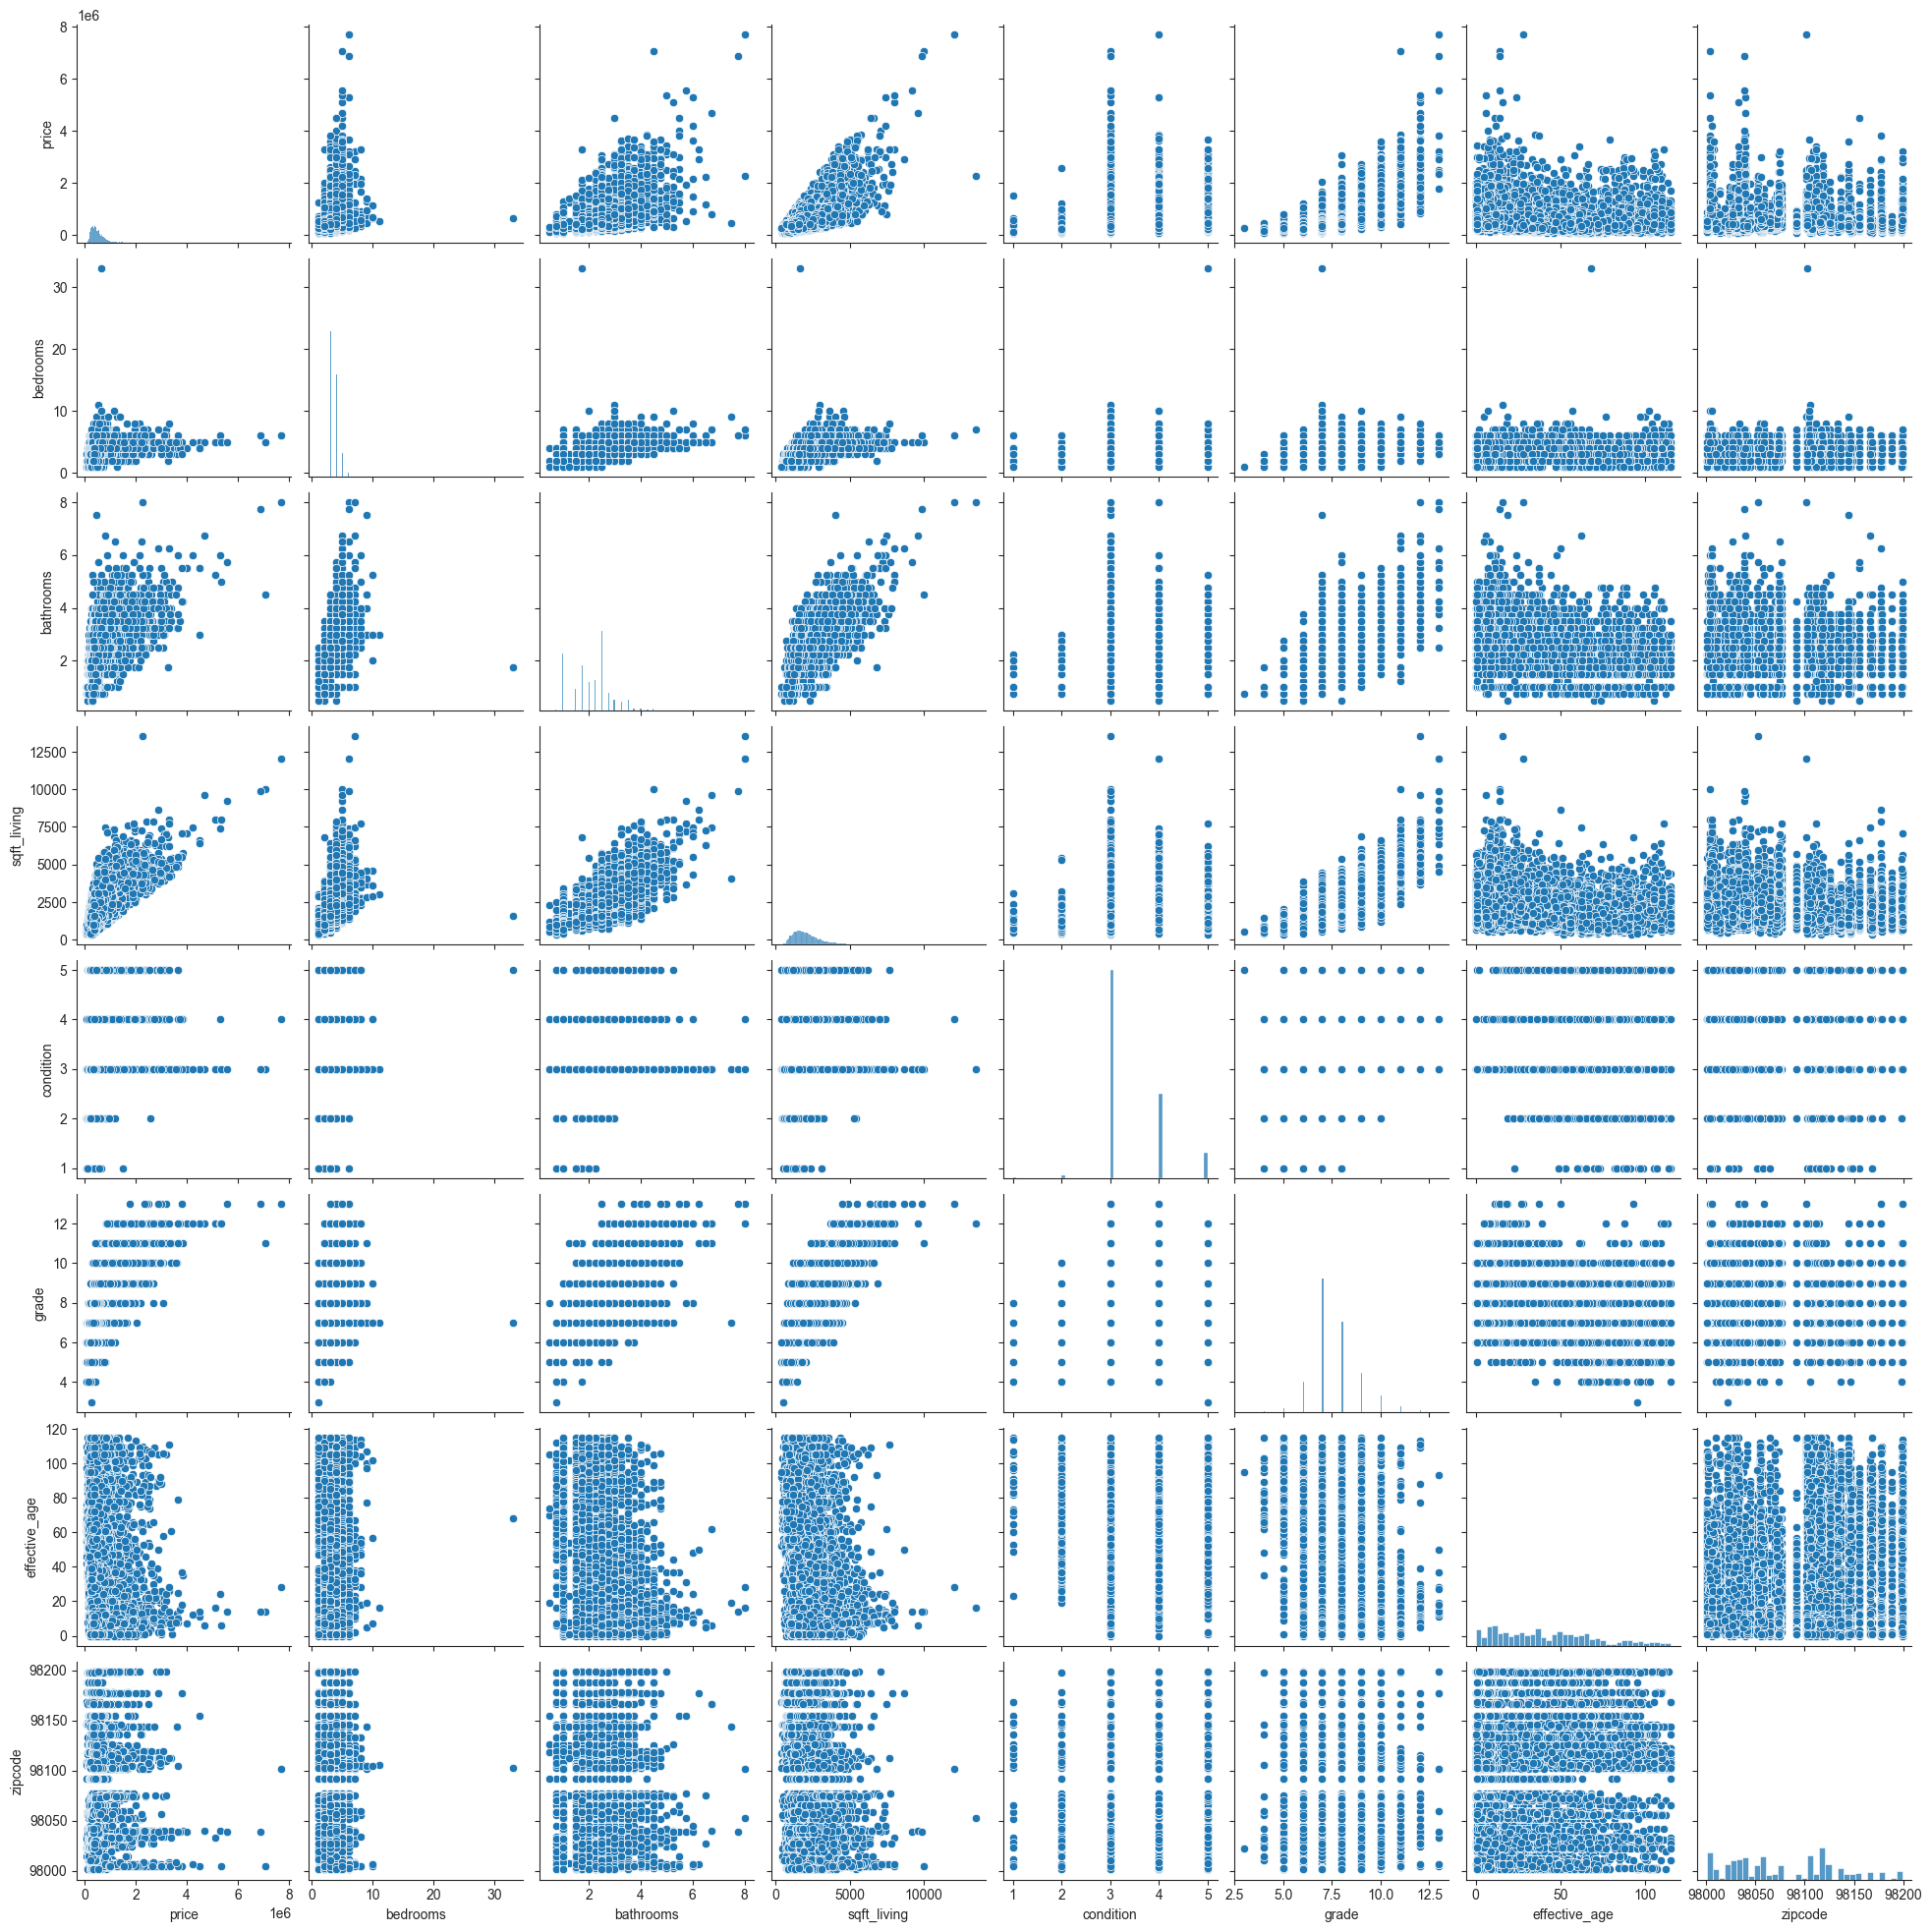

In [16]:
# Plot pair plot of potential features
sns.pairplot(df2[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade', 'effective_age', 'zipcode']])

In [20]:
# Calculate price per sqft
df2['price_per_m2'] = df['price'] / df['sqft_living'] * 0.092903

df2.head(5)


/var/folders/kb/ls2d2k3j3lgdh6ypv0m1qplc0000gn/T/ipykernel_98379/3221231426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_m2'] = df['price'] / df['sqft_living'] * 0.092903


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,effective_age,zipcode,date,price,id.1,price_per_m2
0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,60.0,98178,2014-10-13,221900.0,1,17.470488
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,24.0,98125,2014-12-09,538000.0,2,19.448177
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,82.0,98028,2015-02-25,180000.0,3,21.717584
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,50.0,98136,2014-12-09,604000.0,4,28.629292
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,28.0,98074,2015-02-18,510000.0,5,28.202696


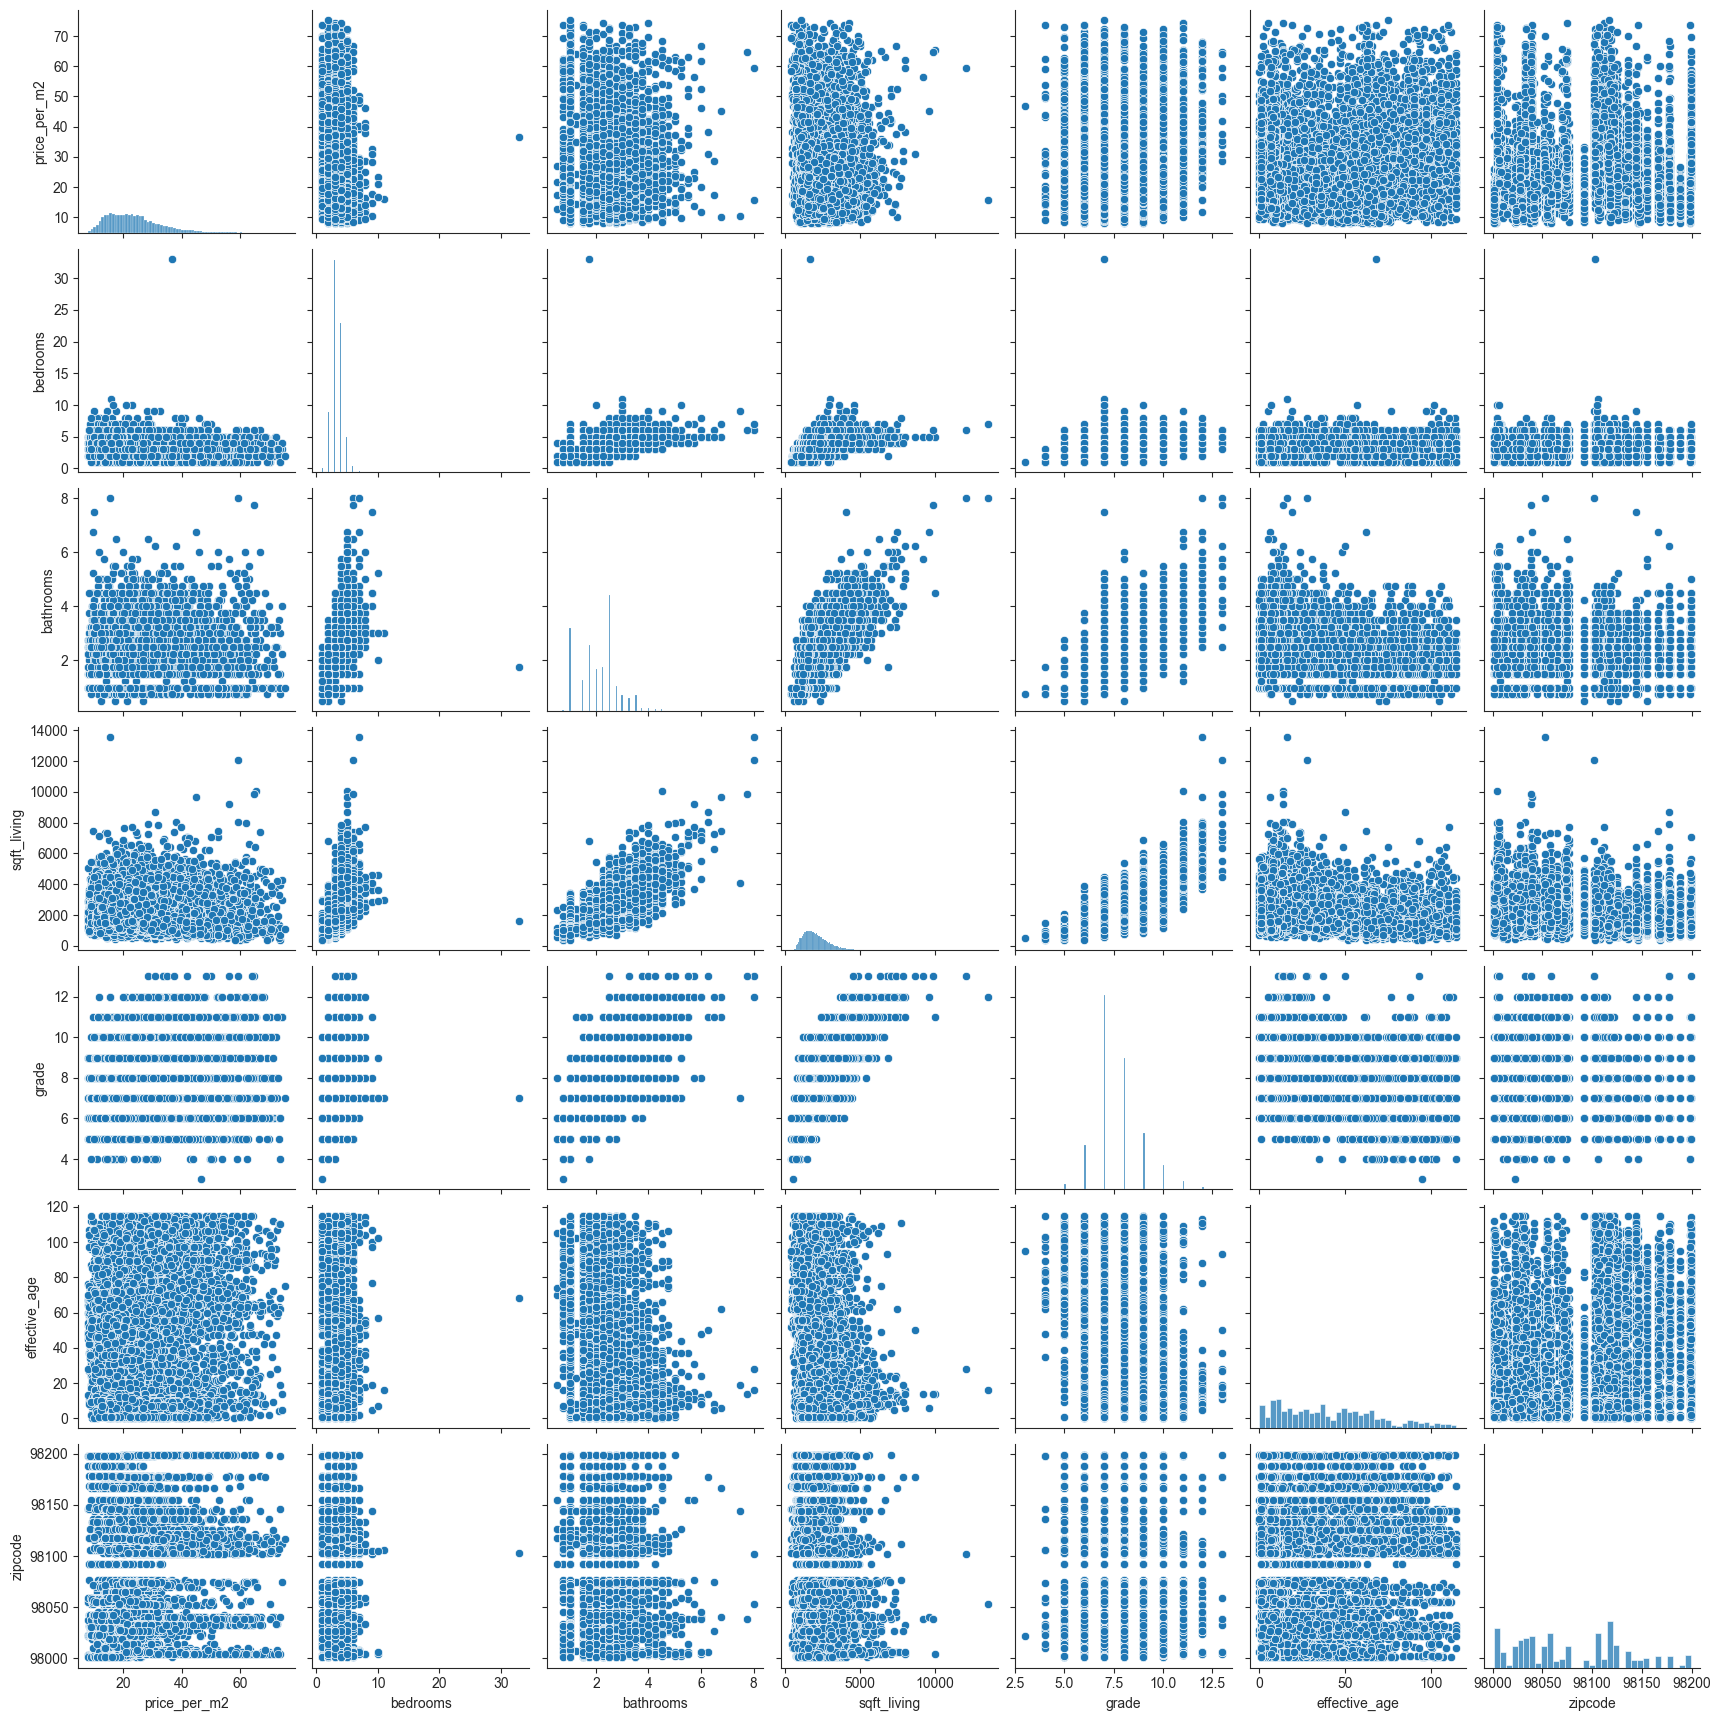

In [21]:
# Plot pair plot of potential features
sns.pairplot(df2[['price_per_m2', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'effective_age', 'zipcode', ]])

In [28]:
# Prepare data for modeling by defining target and feature
X = df2[['price_per_m2']]  # X needs to be 2-dimensional so we need double brackets here
y = df2['bathrooms']

In [29]:
# Show dimensions of X
X.shape

(21597, 1)

In [30]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 2.282543915720387
Coefficient for feature weight: -0.006793789917005661


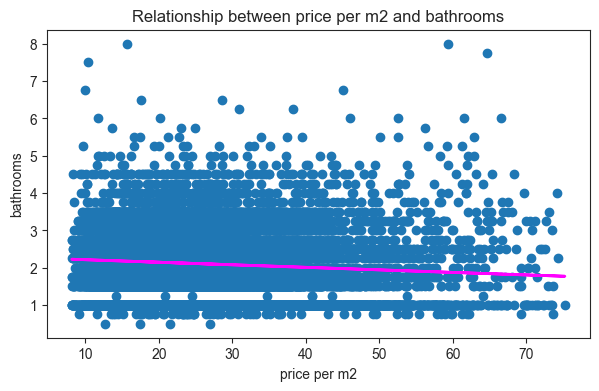

In [33]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between price per m2 and bathrooms")
plt.ylabel("bathrooms");
plt.xlabel("price per m2");